### import Library

In [79]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk 
import re 
from wordcloud import WordCloud

In [80]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

### Exploring Fake News 

In [3]:
fake = pd.read_csv('Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


**Narrative**
+ there are no empty records
+ data is scored as object, we need to convert it to datatime


In [5]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [6]:
fake.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

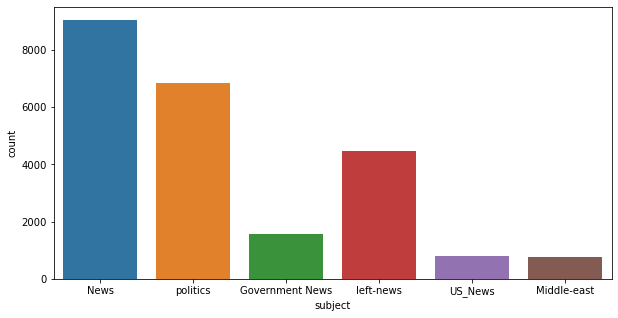

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(x = 'subject' ,data=fake)
# sns.countplot(x = fake['subject']);
plt.show()

**Narrative**
+ US_NEWS, Moddle_east, Government News -> have fewer records


#### ًWordcloud

* without deleting stopwords
* with deleting stopwords

In [8]:
fake_text = ' '.join(fake.text.tolist())

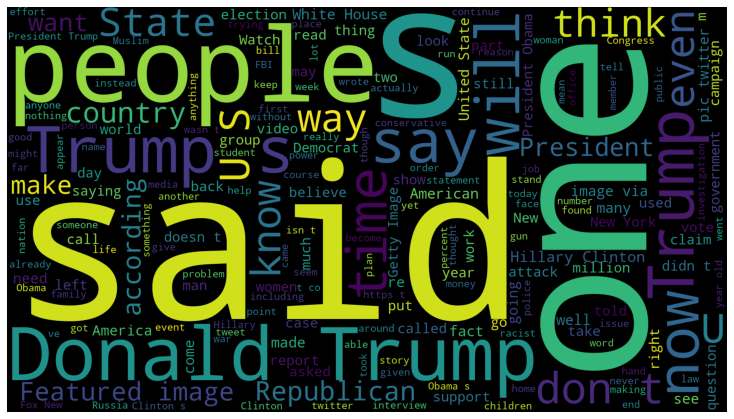

In [9]:
wordcloud = WordCloud(width=1920, height=1080).generate(fake_text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [10]:
# deleting stopwords using nltk 

# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

# en_stopwords = stopwords.words('english')
# fake_text_tokens = word_tokenize(fake_text)
# tokens_without_sw = [word for word in fake_text_tokens if word not in en_stopwords]

# print(f'text len before deleting sw {len(fake_text_tokens)}, after: {len(tokens_without_sw)}')


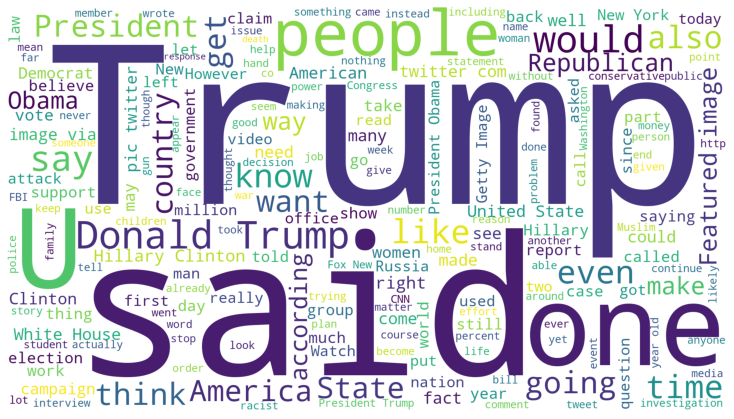

In [11]:
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')


wordcloud = WordCloud(width=1920, height=1080, stopwords=en_stopwords, background_color='white').generate(fake_text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Narrative**
+ words before deleting stopwords =11036978
* words after  deleteing stopwords = 6935095

### Exploring Read News

In [12]:
real = pd.read_csv('True.csv')
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [13]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


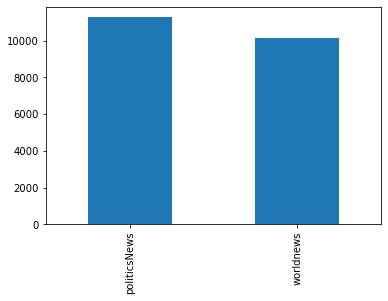

In [14]:
real.subject.value_counts().plot(kind='bar');

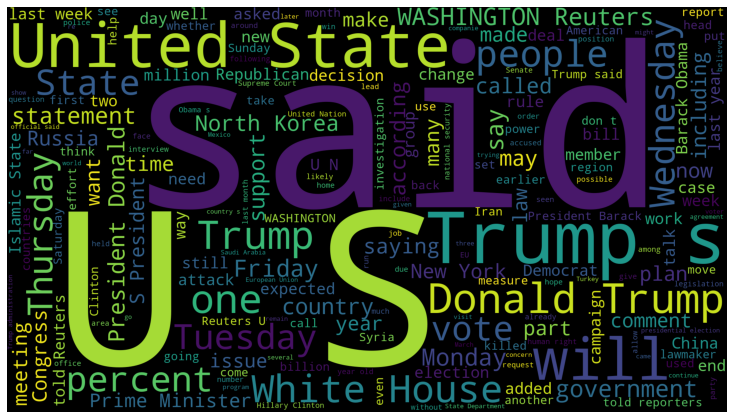

In [15]:
fake_text = ' '.join(real.text.tolist())
wordcloud = WordCloud(width=1920, height=1080).generate(fake_text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


## Cleaning Data
* Removing Reuters or Twitter Tweets information from text

In [16]:
real.sample(3)

,title,text,subject,date
2882,Trump's voter fraud panel to meet as U.S. stat...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"July 7, 2017"
19098,German industry see FDP revival boosting digit...,FRANKFURT (Reuters) - German industry leaders ...,worldnews,"September 25, 2017"
10224,New York lawmakers expected to clear way for m...,"ALBANY, N.Y. (Reuters) - New York is poised to...",politicsNews,"March 22, 2016"


In [17]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
    try:
        record = row.split('-', maxsplit=1)
        # to make it throw an error is there are not ' - '
        record[1]
        assert (len(record[0]) < 120 )
    except :
        unknown_publishers.append(index)

In [18]:
len(unknown_publishers)

222

In [19]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [20]:
# droping empty text record in index 8970

real.drop(8970, axis=0, inplace=True)

In [21]:
puplisher = []
tmp_text = []

for index, row in enumerate(real.text.values):
    if index in unknown_publishers:
        puplisher.append('Unknown')
        tmp_text.append(row)
        
    else:
        record = row.split('-', maxsplit=1)
        puplisher.append(record[0].strip())
        tmp_text.append(record[1].strip())

In [22]:
len(puplisher), len(tmp_text), real.shape[0]

(21416, 21416, 21416)

In [23]:
real['puplisher'] = puplisher
real['text'] = tmp_text

del puplisher, tmp_text

In [24]:
real.head()

,title,text,subject,date,puplisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [25]:
# fake news empty text 

empty_index = [index for index, text in enumerate(fake.text.values) if str(text).strip() == '']
print(len(empty_index))
fake.iloc[empty_index]

630


,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


**Narrative** 

+ we can see that the text is empty, but the accuale text is stored in the titile columns, so will concatonate both od them in one.

In [26]:
real['text'] = real['title'] + ' ' + real['text']
fake['text'] = fake['title'] + ' ' + fake['text']
real.drop('title', axis=1, inplace=True)
fake.drop('title', axis=1, inplace=True)

In [27]:
real.text = real.text.str.lower()
fake.text = fake.text.str.lower()


### Text Preprocessing

+ adding target 
+ select only the usefull features 
+ Concatona

In [28]:
# adding label to do the classification on 

real['class'] = 1
fake['class'] = 0

In [29]:
# select only the usefull features
real = real[['text', 'class']]
fake = fake[['text', 'class']]

In [52]:
data = real.append(fake, ignore_index=True)

In [53]:
data.sample(5)

,text,class
20837,nigeria's buhari said he would not seek re-ele...,1
35838,"new “fair share” app, “equipay” allows users t...",0
32979,hysterical! jesse watters busts the idiotic “w...,0
13378,georgia says suspect in istanbul airport bombi...,1
22957,"gizmodo tricks james comey, trump advisers in...",0


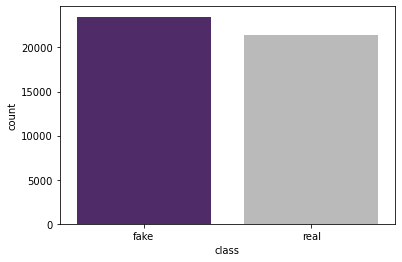

In [54]:
sns.countplot(x=data['class'],palette=['#512172',"#BABABA"])
plt.xticks([0, 1], ['fake', 'real'], rotation='horizontal', )
plt.show()

In [55]:
data.to_csv('data.csv', index=False)

In [56]:
# string = 'sdfkls fjfs a@# 4 flwe;k fjdosf ewq348'
# # ''.join([e for e in string if e.isalnum()])
# re.sub('[^ A-Za-z0-9]+', '', string)

In [60]:
data = pd.read_csv('data.csv')
data['text'] =  data.text.apply(lambda string: re.sub('[^ A-Za-z0-9]+', '', string))

In [61]:
data.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1



### Vectorization - Word2Vec

In [62]:
import gensim

In [67]:
y = data['class'].values
X = [d.split() for d in data['text'].tolist()]

In [72]:
DIM = 100 
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window=10, min_count=1)
w2v_model.save('fake_news.model')

In [73]:
w2v_model= gensim.models.Word2Vec.load('fake_news.model')

In [77]:
w2v_model.wv.most_similar(['egypt'])

[('kuwait', 0.7314708232879639),
 ('cairo', 0.7260684967041016),
 ('bahrain', 0.6969408392906189),
 ('qatar', 0.6959728002548218),
 ('tunisia', 0.6765259504318237),
 ('algeria', 0.6733622550964355),
 ('oman', 0.6718379259109497),
 ('ethiopia', 0.6685035824775696),
 ('egyptian', 0.6665487885475159),
 ('cyprus', 0.6573765277862549)]

In [82]:
# Tokenization 

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)


In [83]:
X = tokenizer.texts_to_sequences(X)

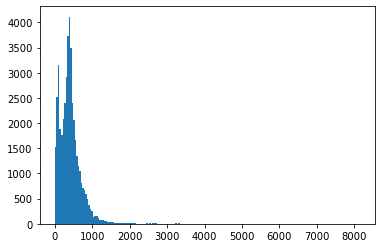

In [91]:
plt.hist([len(x) for x in X], bins=200)
plt.show()

In [93]:
# how many news have more than 1000 words

nos = np.array([len(x) for x in X])
len(nos[nos>1000])

1581

In [94]:
maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)

In [96]:
print(len(X[0]))

1000


In [98]:
# +1 for out of vocab words

vocab_size = len(tokenizer.word_index) + 1 
vocab = tokenizer.word_index
vec_text = {value:key for key, value in text_vec.items()}

In [104]:
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size, 100))
    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]
    return weight_matrix

In [144]:
embedding_vectors[0].shape

(100,)

In [105]:
embedding_vectors = get_weight_matrix(w2v_model)

In [106]:
embedding_vectors.shape

(231779, 100)

In [112]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=100, weights=[embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [113]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 100)         23177900  
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23,295,277
Trainable params: 117,377
Non-trainable params: 23,177,900
_________________________________________________________________


In [118]:
real.shape, fake.shape, X.shape

((21416, 2), (23481, 2), (44897, 1000))

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [123]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
786/786 [==============================] - 98s 117ms/step - loss: 0.1303 - accuracy: 0.9533 - val_loss: 0.0617 - val_accuracy: 0.9813-  - ETA: 37s - loss: 0.1631 - accuracy: 0.9 - ETA: 37s - 
Epoch 2/6
786/786 [==============================] - 89s 114ms/step - loss: 0.0470 - accuracy: 0.9847 - val_loss: 0.0533 - val_accuracy: 0.9848
Epoch 3/6
786/786 [==============================] - 85s 108ms/step - loss: 0.0417 - accuracy: 0.9863 - val_loss: 0.0352 - val_accuracy: 0.9881
Epoch 4/6
786/786 [==============================] - 86s 109ms/step - loss: 0.0167 - accuracy: 0.9947 - val_loss: 0.0244 - val_accuracy: 0.9922
Epoch 5/6
786/786 [==============================] - 87s 110ms/step - loss: 0.0145 - accuracy: 0.9953 - val_loss: 0.0269 - val_accuracy: 0.9923
Epoch 6/6
786/786 [==============================] - 88s 112ms/step - loss: 0.0092 - accuracy: 0.9969 - val_loss: 0.0208 - val_accuracy: 0.9944


In [124]:
model.save("model.h5")

In [125]:
y_pred = (model.predict(X_test) > 0.5 ).astype(int)

In [126]:
accuracy_score(y_test, y_pred)

0.9942093541202672

In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4644
           1       0.99      0.99      0.99      4336

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [128]:
from tensorflow.keras.models import load_model

### Using the model with read data

In [135]:
model = load_model('model.h5')
maxlen = 1000


In [140]:
x = ['this is a news']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
(model.predict(x) > 0.5).astype(int)[0][0]

0

In [ ]:
# !pip install fasttext
